## **Project**: **Predicting Used Car Prices**

### Getting started

#### Objective
The objective of this project is to build a predictive model for car prices using a dataset of used cars. The project involves conducting comprehensive exploratory data analysis (EDA) to understand the relationships between various features and car prices, preprocessing the data to handle missing values and encode categorical variables, engineering new features, and evaluating the performance of different regression models. The ultimate goal is to create an accurate and reliable model that can predict the price of a used car based on its attributes, and to effectively communicate the findings and insights through clear and informative visualizations.

In [85]:
# Import Libraries necessary for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings

warnings.filterwarnings('ignore')

In [86]:
# load the data
df = pd.read_csv("usedCars.csv")

### Data Exploration

In [87]:
# first 5 Rows of DataFrame
df.head(5)

,Id,Company,Model,Variant,FuelType,Colour,Kilometer,BodyStyle,TransmissionType,ManufactureDate,ModelYear,CngKit,Price,Owner,DealerState,DealerName,City,Warranty,QualityScore
0,555675,MARUTI SUZUKI,CELERIO(2017-2019),1.0 ZXI AMT O,PETROL,Silver,33197,HATCHBACK,NaN,2018-02-01,2018,NaN,5.75 Lakhs,1st Owner,Karnataka,Top Gear Cars,Bangalore,1,7.8
1,556383,MARUTI SUZUKI,ALTO,LXI,PETROL,Red,10322,HATCHBACK,Manual,2021-03-01,2021,NaN,4.35 Lakhs,1st Owner,Karnataka,Renew 4 u Automobiles PVT Ltd,Bangalore,1,8.3
2,556422,HYUNDAI,GRAND I10,1.2 KAPPA ASTA,PETROL,Grey,37889,HATCHBACK,Manual,2015-03-01,2015,NaN,4.7 Lakhs,1st Owner,Karnataka,Anant Cars Auto Pvt Ltd,Bangalore,1,7.9
3,556771,TATA,NEXON,XT PLUS,PETROL,A Blue,13106,HATCHBACK,NaN,2020-08-01,2020,NaN,9.9 Lakhs,1st Owner,Karnataka,Adeep Motors,Bangalore,1,8.1
4,559619,FORD,FIGO,EXI DURATORQ 1.4,DIESEL,Silver,104614,HATCHBACK,Manual,2010-11-01,2010,NaN,2.7 Lakhs,2nd Owner,Karnataka,Zippy Automart,Bangalore,0,7.5


In [88]:
# Random subset of DataFrame
df.sample(5)

,Id,Company,Model,Variant,FuelType,Colour,Kilometer,BodyStyle,TransmissionType,ManufactureDate,ModelYear,CngKit,Price,Owner,DealerState,DealerName,City,Warranty,QualityScore
265,581950,HYUNDAI,I20,SPORTZ 1.2 O,PETROL,White,64462,HATCHBACK,Manual,2015-04-01,2015,NaN,4.8 Lakhs,2nd Owner,Maharashtra,OM Motors,Pune,1,6.7
134,586965,MARUTI SUZUKI,BALENO,ZETA,PETROL,Pearl White,38966,HATCHBACK,NaN,2021-02-01,2021,NaN,8.5 Lakhs,1st Owner,Karnataka,Adeep Motors,Bangalore,1,8.7
606,555338,KIA,SELTOS,HTX PLUS 1.5 DIESEL,DIESEL,A Blue,25000,SUV,NaN,2019-11-01,2019,NaN,13.75 Lakhs,1st Owner,Haryana,SUSHIL CARS PVT. LTD,Gurgaon,0,7.8
753,559210,MARUTI SUZUKI,SWIFT,LXI,PETROL,Grey,19129,HATCHBACK,Manual,2019-02-01,2019,NaN,5.45 Lakhs,1st Owner,Uttar Pradesh,Noida Car Ghar,Noida,1,7.8
30,574951,MAHINDRA,XUV500,W8,DIESEL,Grey,67147,SUV,Manual,2014-03-01,2014,NaN,9.5 Lakhs,1st Owner,Karnataka,Anant Cars Auto Pvt Ltd,Bangalore,1,7.2


In [89]:
# Shape of the Data
print(f"Shape of data: {df.shape}")

Shape of data: (1064, 19)


In [90]:
# Total number of Data Count
print(f"Total number of data count: {len(df)}")

Total number of data count: 1064


In [91]:
# Brief Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                1064 non-null   int64  
 1   Company           1064 non-null   object 
 2   Model             1064 non-null   object 
 3   Variant           1064 non-null   object 
 4   FuelType          1063 non-null   object 
 5   Colour            1064 non-null   object 
 6   Kilometer         1064 non-null   int64  
 7   BodyStyle         1064 non-null   object 
 8   TransmissionType  350 non-null    object 
 9   ManufactureDate   1064 non-null   object 
 10  ModelYear         1064 non-null   int64  
 11  CngKit            22 non-null     object 
 12  Price             1064 non-null   object 
 13  Owner             1064 non-null   object 
 14  DealerState       1064 non-null   object 
 15  DealerName        1064 non-null   object 
 16  City              1064 non-null   object 


#### Summary
- The dataset contains 1064 rows.
- The columns Id, Kilometer, ModelYear, Warranty, and QualityScore are numerical.
- The remaining columns appear to contain categorical data, such as the car's company, model, variant, fuel type, color, body style, transmission type, owner, dealer state, dealer name, and city.
- The column CngKit has a large number of null values (978 out of 1064), suggesting that CNG kits are not common in the data.
- The column TransmissionType also has a large number of null values (714 out of 1064), suggesting that transmission type information is not available for many cars.
- The column Price is of type object, which means it may contain non-numeric values (e.g., strings). Further analysis would be needed to determine the exact format of the price data.

In [92]:
# The number of unique values in specific columns.
df.nunique()

Id                  1064
Company               23
Model                218
Variant              575
FuelType               5
Colour                76
Kilometer           1006
BodyStyle             10
TransmissionType       9
ManufactureDate      162
ModelYear             17
CngKit                 2
Price                367
Owner                  4
DealerState           10
DealerName            57
City                  11
Warranty               2
QualityScore          43
dtype: int64

In [93]:
# Checking the unique values through all the columns of dataset 
for col in df.columns:
    print('Unique Values of ' + col)
    print(df[col].unique())
    print("=====================\n")

Unique Values of Id
[555675 556383 556422 ... 588946 588949 588950]

Unique Values of Company
['MARUTI SUZUKI' 'HYUNDAI' 'TATA' 'FORD' 'MERCEDES BENZ' 'VOLKSWAGEN'
 'MAHINDRA' 'HONDA' 'RENAULT' 'NISSAN' 'JEEP' 'FIAT' 'TOYOTA' 'KIA' 'BMW'
 'DATSUN' 'SKODA' 'MG' 'AUDI' 'ISUZU' 'VOLVO' 'MITSUBISHI' 'CHEVROLET']

Unique Values of Model
['CELERIO(2017-2019)' 'ALTO' 'GRAND I10' 'NEXON' 'FIGO' 'E CLASS' 'AMEO'
 'ERTIGA' 'SWIFT' 'I10' 'CELERIO' 'CRETA(2018-2019)' 'VITARA BREZZA'
 'XUV500' 'JAZZ' 'DUSTER' 'MICRA ACTIVE' 'COMPASS' 'ELITE I20' 'TERRANO'
 'FIESTA(2008-2011)' 'XCENT' 'BRIO' 'VERNA' 'TIAGO' 'WR V' 'BALENO'
 'GRAND PUNTO' 'EON' 'I20 ACTIVE' 'ECOSPORT' 'POLO' 'XUV500(2011_2015)'
 'MICRA' 'FORTUNER' 'SWIFT DZIRE' 'KWID(2015_2019)' 'GRAND I10(2017-2020)'
 'AMAZE' 'VENUE' 'ZEN ESTILO' 'TIGOR(2018-2020)' 'POLO(2012-2014)'
 'KUV100' 'FIGO(2012-2015)' 'TRIBER' 'ALTROZ' 'WAGON R 1.0' 'CITY'
 'SELTOS' 'CELERIO X' 'SCORPIO' 'CRETA' 'I20' 'TIGOR' 'FIGO ASPIRE'
 'ECOSPORT(2017-2019)' 'KICKS' 'SA

In [94]:
# Descriptive Statistics of Dataset
df.describe()

,Id,Kilometer,ModelYear,Warranty,QualityScore
count,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000
mean,568156.542293,52807.187970,2016.864662,0.738722,7.770207
std,16438.139974,33840.296979,2.996786,0.439538,0.719717
min,525978.000000,101.000000,2003.000000,0.000000,0.000000
25%,555321.500000,32113.500000,2015.000000,0.000000,7.500000
50%,572753.000000,49432.000000,2017.000000,1.000000,7.800000
75%,583072.750000,68828.500000,2019.000000,1.000000,8.100000
max,589122.000000,640000.000000,2023.000000,1.000000,9.400000


#### Summary
1. Kilometer: The average mileage is around 568,156.54 km, with a standard deviation of 16,438.14 km. This indicates a wide range of mileages among the vehicles.
2. ModelYear: The average manufacturing year is 2016.86, with a range from 2003 to 2023.
3. Warranty: The warranty status is mostly binary (0 or 1), suggesting it's likely a boolean indicator.
4. QualityScore: The average quality score is 7.77, with a standard deviation of 0.72. This indicates a relatively consistent quality rating among the vehicles.


In [95]:
# Null Value Counts per DataFrame Column
df.isnull().sum()

Id                     0
Company                0
Model                  0
Variant                0
FuelType               1
Colour                 0
Kilometer              0
BodyStyle              0
TransmissionType     714
ManufactureDate        0
ModelYear              0
CngKit              1042
Price                  0
Owner                  0
DealerState            0
DealerName             0
City                   0
Warranty               0
QualityScore           0
dtype: int64

In [96]:
# Duplicated values in dataframe
print(f"Number of duplicate values in the dataset is {df.duplicated().sum()}")

Number of duplicate values in the dataset is 0


### Data Preprocessing

In [97]:
# Convert 'Price' to numeric
df['Price'] = df['Price'].str.split(' ').str[0]

In [98]:
# replace commas to blank 
df['Price'] = df['Price'].str.replace(',','').astype('float')

In [99]:
# confirming datatype of price
df['Price'].dtypes

dtype('float64')

In [100]:
# splitting model name from brackets
df['Model'] = df['Model'].apply(lambda x: x.split('(')[0])

In [101]:
# trailing extra spaces
df['BodyStyle'] = df['BodyStyle'].str.strip().str.upper()

In [102]:
# Correcting Transmission Values
def convert_transmission(value):
    if pd.isna(value):
        return np.nan
    value = value.strip().upper()
    if value in ['MANUAL', 'M']:
        return 'M'
    elif value in ['AUTOMATIC', 'A', 'CVT', 'AUOTMATIC']:
        return 'A'
    else:
        return np.nan 

df['TransmissionType'] = df['TransmissionType'].apply(convert_transmission)

In [103]:
# checking null values to treat
df.isnull().sum()

Id                     0
Company                0
Model                  0
Variant                0
FuelType               1
Colour                 0
Kilometer              0
BodyStyle              0
TransmissionType     714
ManufactureDate        0
ModelYear              0
CngKit              1042
Price                  0
Owner                  0
DealerState            0
DealerName             0
City                   0
Warranty               0
QualityScore           0
dtype: int64

In [104]:
# Dropping fueltype null value 
df.dropna(subset=['FuelType'], inplace=True)

In [105]:
# value count of transmission type
df['TransmissionType'].value_counts()

TransmissionType
M    294
A     56
Name: count, dtype: int64

### Data Visualisation

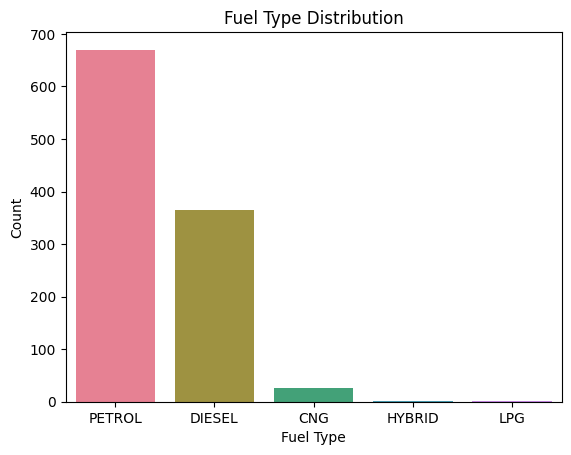

In [106]:
# Highlight the dominant fuel type

fuel_counts = df['FuelType'].value_counts().reset_index()
fuel_counts.columns = ['FuelType', 'Count']

custom_palette = sns.color_palette("husl", len(fuel_counts))

sns.barplot(x='FuelType', y='Count', data=fuel_counts, palette=custom_palette)

plt.title('Fuel Type Distribution')
plt.xlabel('Fuel Type')
plt.ylabel('Count')

plt.show()

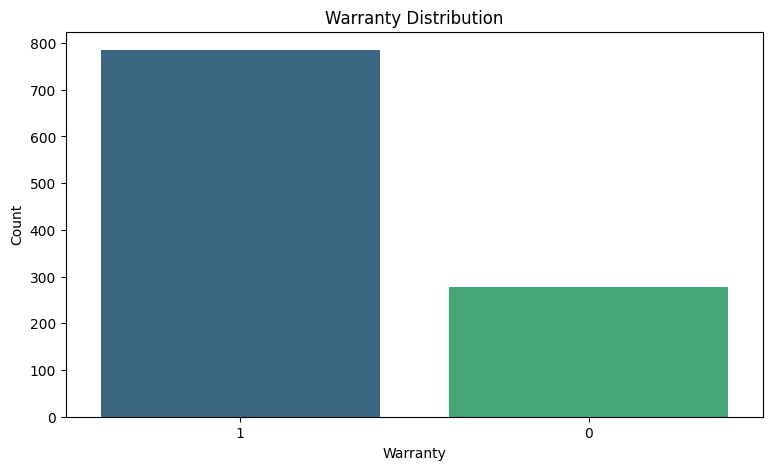

In [107]:
# Warranty Distribution

plt.figure(figsize=(9, 5))
sns.countplot(x='Warranty', data=df, palette='viridis', order=df['Warranty'].value_counts().index)

plt.title('Warranty Distribution')
plt.xlabel('Warranty')
plt.ylabel('Count')

plt.show()

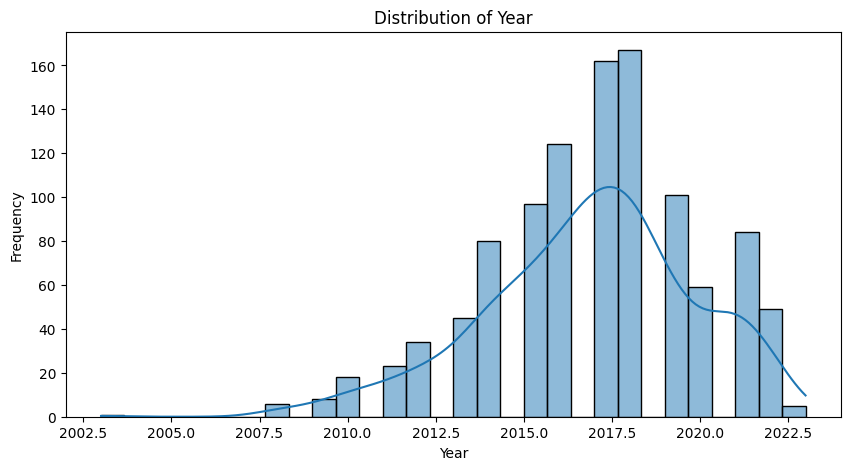

In [108]:
# Year-Over-Year: Exploring Car Model Year Patterns

plt.figure(figsize=(10, 5))
sns.histplot(df['ModelYear'], bins=30, kde=True)
plt.title('Distribution of Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

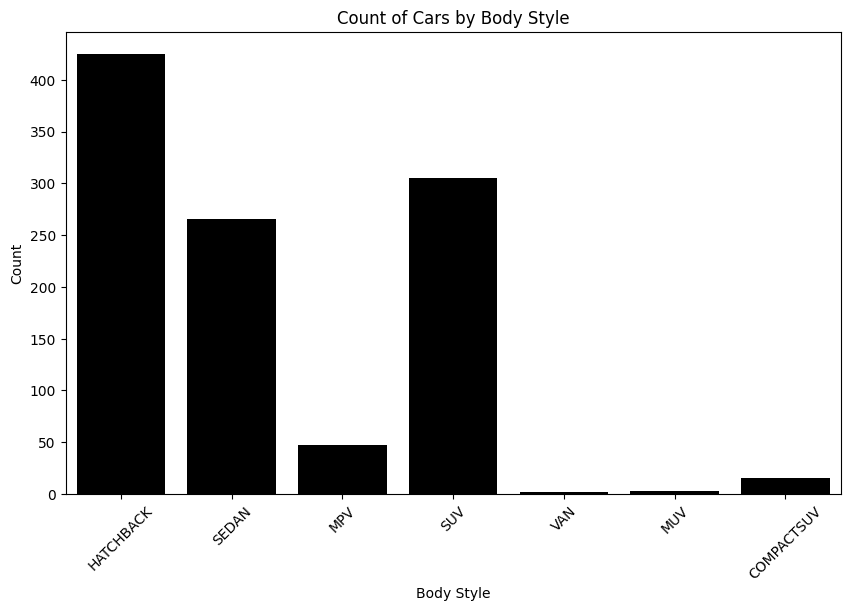

In [109]:
# Car Body Style Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='BodyStyle', data=df, color='black')
plt.xlabel('Body Style')
plt.ylabel('Count')
plt.title('Count of Cars by Body Style')
plt.xticks(rotation=45)
plt.show()

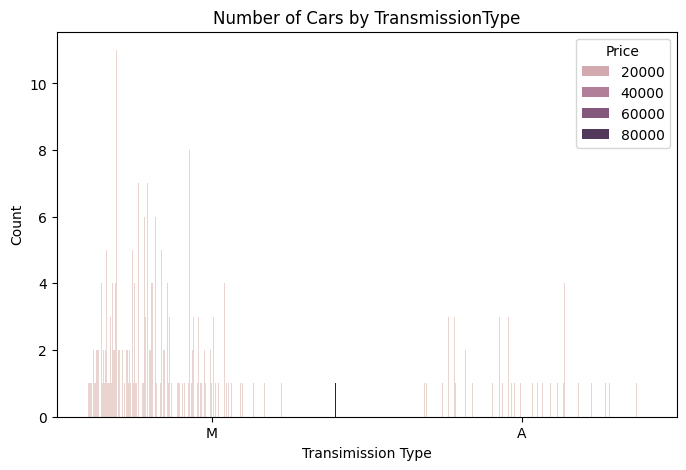

In [110]:
# Auto vs Manual: Exploring Car Transmission Type Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='TransmissionType', data=df, hue='Price')
plt.title('Number of Cars by TransmissionType')
plt.xlabel('Transimission Type')
plt.ylabel('Count')
plt.show()

<Figure size 1200x800 with 0 Axes>

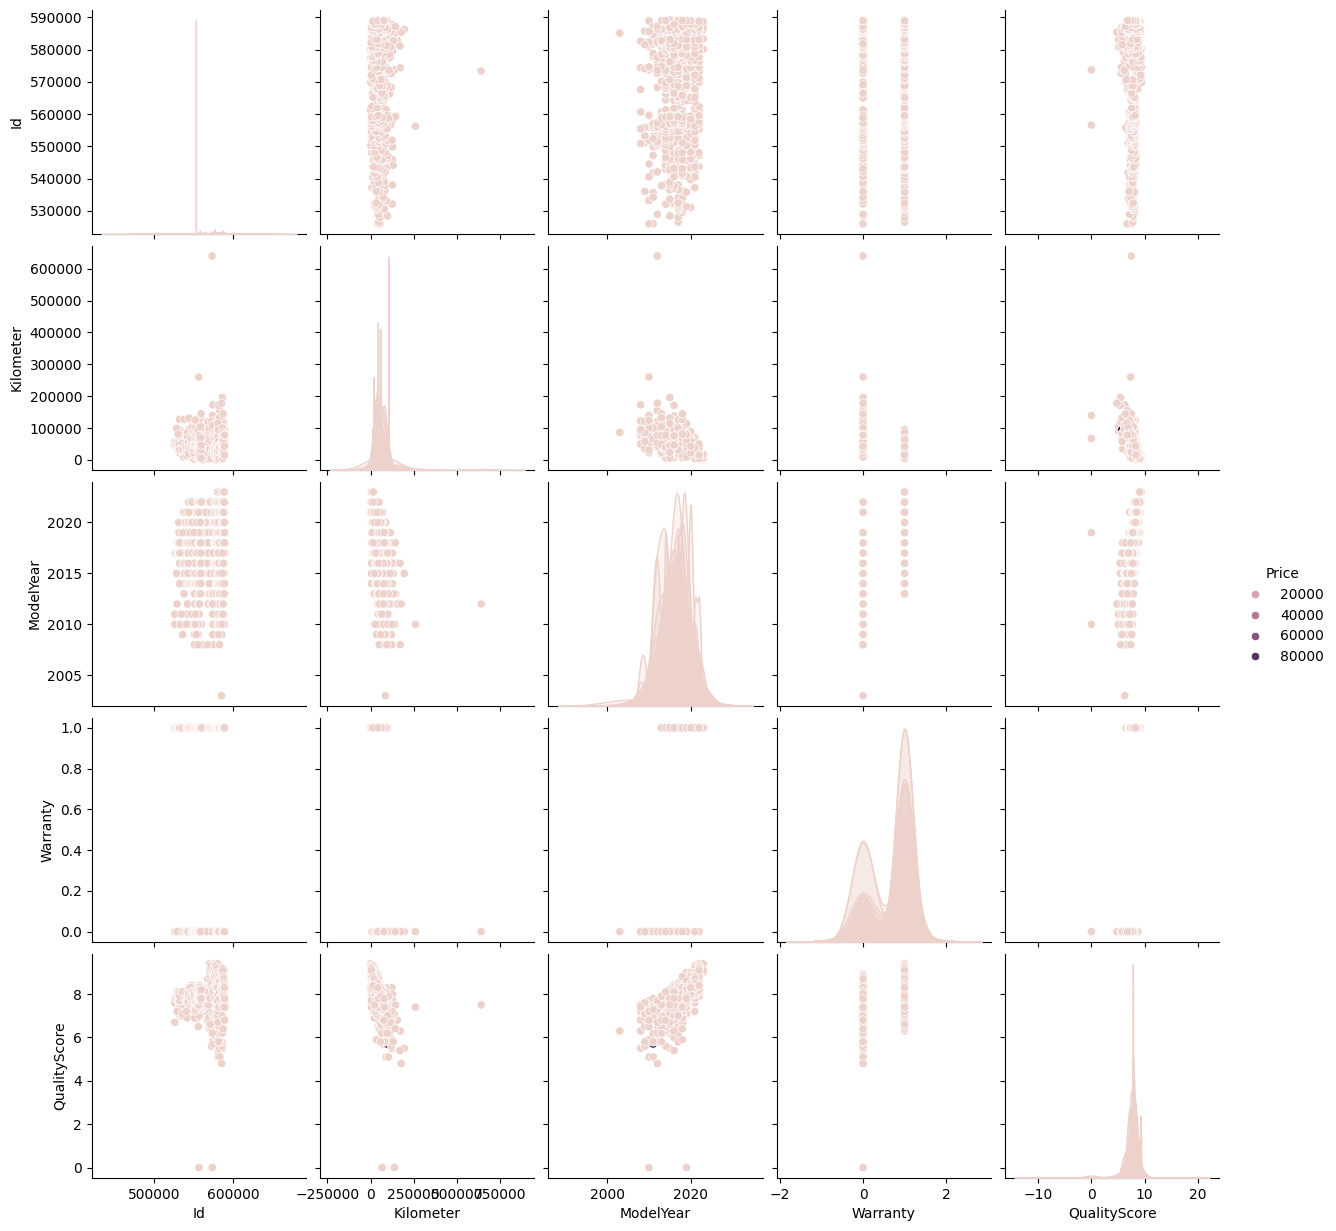

In [111]:
#  Pairplot Visualization with Price Hue
plt.figure(figsize=(12, 8))
sns.pairplot(df, hue='Price')
plt.show()

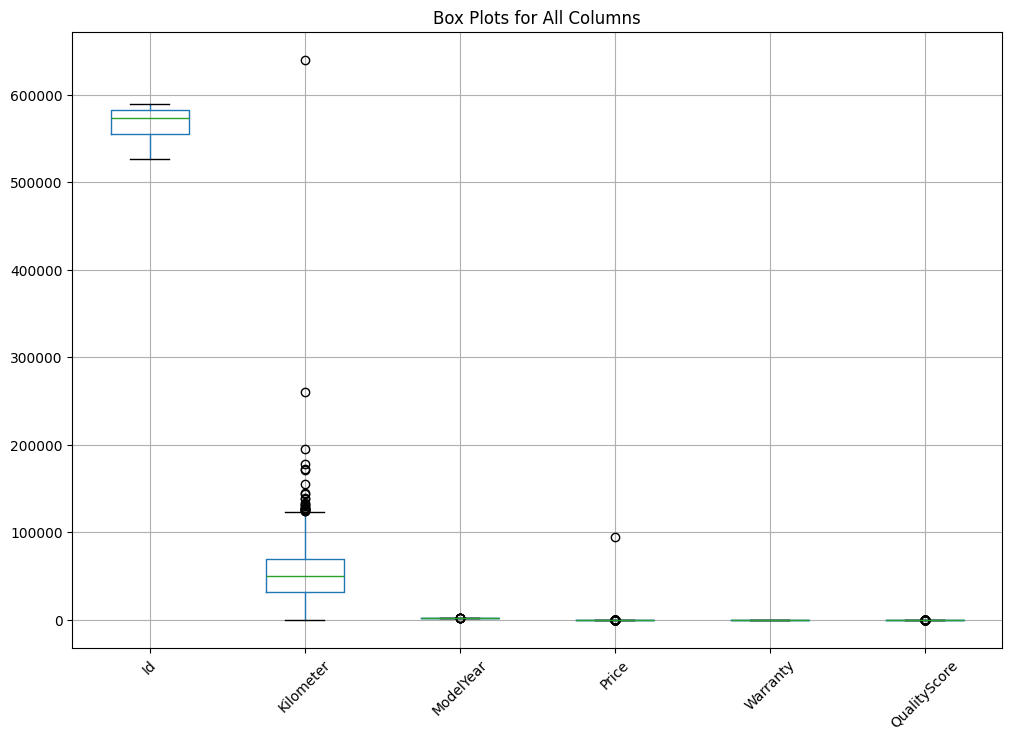

In [112]:
# Outliers detection through Box Plot

df.boxplot(figsize=(12, 8))
plt.title("Box Plots for All Columns")
plt.xticks(rotation=45)
plt.show()

In [113]:
# Null values in Transmission Type column in percentage
df['TransmissionType'].isnull().sum()/len(df['TransmissionType']) * 100

67.07431796801505

In [114]:
# data could be baised thats why dropping this column
#df.drop(columns={'TransmissionType'}, inplace=True)

In [115]:
# Missing values in Cngkit columns in percentage
df['CngKit'].isnull().sum()/len(df['CngKit']) * 100

97.93038570084666

In [116]:
# column has 97 percentage of missing values which is not useful
df.drop(columns={'CngKit'}, inplace=True)

In [117]:
df.head(3)

,Id,Company,Model,Variant,FuelType,Colour,Kilometer,BodyStyle,TransmissionType,ManufactureDate,ModelYear,Price,Owner,DealerState,DealerName,City,Warranty,QualityScore
0,555675,MARUTI SUZUKI,CELERIO,1.0 ZXI AMT O,PETROL,Silver,33197,HATCHBACK,NaN,2018-02-01,2018,5.75,1st Owner,Karnataka,Top Gear Cars,Bangalore,1,7.8
1,556383,MARUTI SUZUKI,ALTO,LXI,PETROL,Red,10322,HATCHBACK,M,2021-03-01,2021,4.35,1st Owner,Karnataka,Renew 4 u Automobiles PVT Ltd,Bangalore,1,8.3
2,556422,HYUNDAI,GRAND I10,1.2 KAPPA ASTA,PETROL,Grey,37889,HATCHBACK,M,2015-03-01,2015,4.70,1st Owner,Karnataka,Anant Cars Auto Pvt Ltd,Bangalore,1,7.9


### Feature Engineering

In [118]:
from datetime import datetime

In [119]:
# creating current year
current_year = datetime.now().year
current_year

2024

In [120]:
# creating new column Car Age
df['Car_Age'] = current_year - df['ModelYear']
df['Car_Age'].dtypes

dtype('int64')

In [121]:
# Creating new column mileage
mileage_per_year = df['Kilometer'] / df['Car_Age']
df['Mileage'] = round(mileage_per_year)
df['Mileage'].dtypes

dtype('float64')

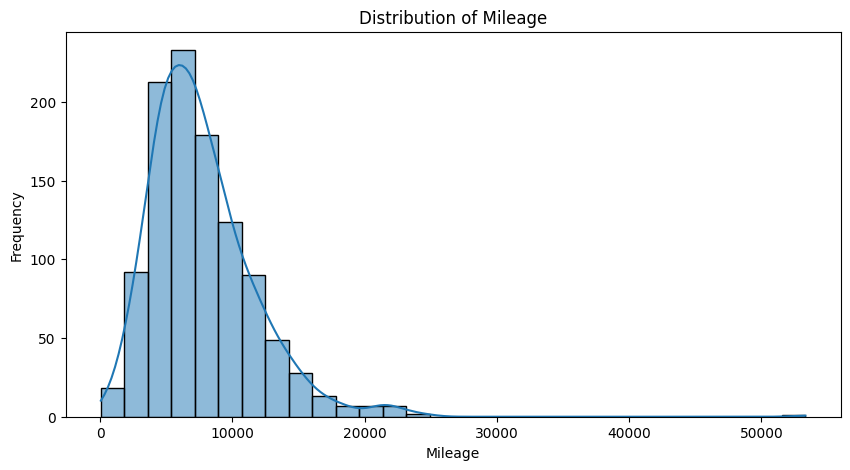

In [122]:
# Checking Distribution of Mileage Column
plt.figure(figsize=(10, 5))
sns.histplot(df['Mileage'], bins=30, kde=True)
plt.title('Distribution of Mileage')
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.show()

In [123]:
# Dropping these columns because not usefull for model building
df.drop(columns={"Id", 'ManufactureDate'}, inplace=True)

##### Convet categorical into numerical 


In [124]:
# Categorical columns of dataset
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

Index(['Company', 'Model', 'Variant', 'FuelType', 'Colour', 'BodyStyle',
       'TransmissionType', 'Owner', 'DealerState', 'DealerName', 'City'],
      dtype='object')

In [125]:
# Applying label encoding to categoricals columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [126]:
# dataframe after encoding
df.head(2)

,Company,Model,Variant,FuelType,Colour,Kilometer,BodyStyle,TransmissionType,ModelYear,Price,Owner,DealerState,DealerName,City,Warranty,QualityScore,Car_Age,Mileage
0,12,26,5,4,61,33197,1,2,2018,5.75,0,2,52,0,1,7.8,6,5533.0
1,12,9,275,4,56,10322,1,1,2021,4.35,0,2,38,0,1,8.3,3,3441.0


In [127]:
df['TransmissionType'].value_counts()

TransmissionType
2    713
1    294
0     56
Name: count, dtype: int64

In [128]:
# unique values of columns after encoding
for col in df.columns:
    print('Unique Values of ' + col)
    print(df[col].unique())
    print("=====================\n")

Unique Values of Company
[12  7 19  5 13 21 11  6 17 16  9  4 20 10  1  3 18 14  0  8 22 15  2]

Unique Values of Model
[ 26   9  58  87  52  40  14  48 110  65  36 130 142  71  38  83  34  45
 113  51 138  21 128 115 133  18  60  47  67  42  91  82  54 111  78  13
 126 145 116  76 118  12 132  29 105  27 103  66  53  72 101  97  70 141
  28 136  95  43  25 144  15  19  57  94  63   8  17  44 125  31  49  96
 112  10  59 131  39  62   4 119  11 120  80 147  69 127 140   2 106  35
  55 123  46  88  37   3  92  86 124 109 143  56  89  33  73  75  23   1
  16  30  22   5 139  64 117   7 129  41 122 107  68  61  93 134   0  99
 114 100 108  79  74  90   6  81  50 137 146  24  85 102  77  32  84 135
  20 121 104  98]

Unique Values of Variant
[  5 275  10 527 211 196 234 561 289 227 570 172 451 501  27 148 319 511
 563 484 469 259 298 517 402 329 332 295 455 500 534  26 468 188 430 357
 205  16  11 418 567 167 510 135 122 447 481   3 293  31  18 362  58  22
 310 400 479 305 436 495 250 191 

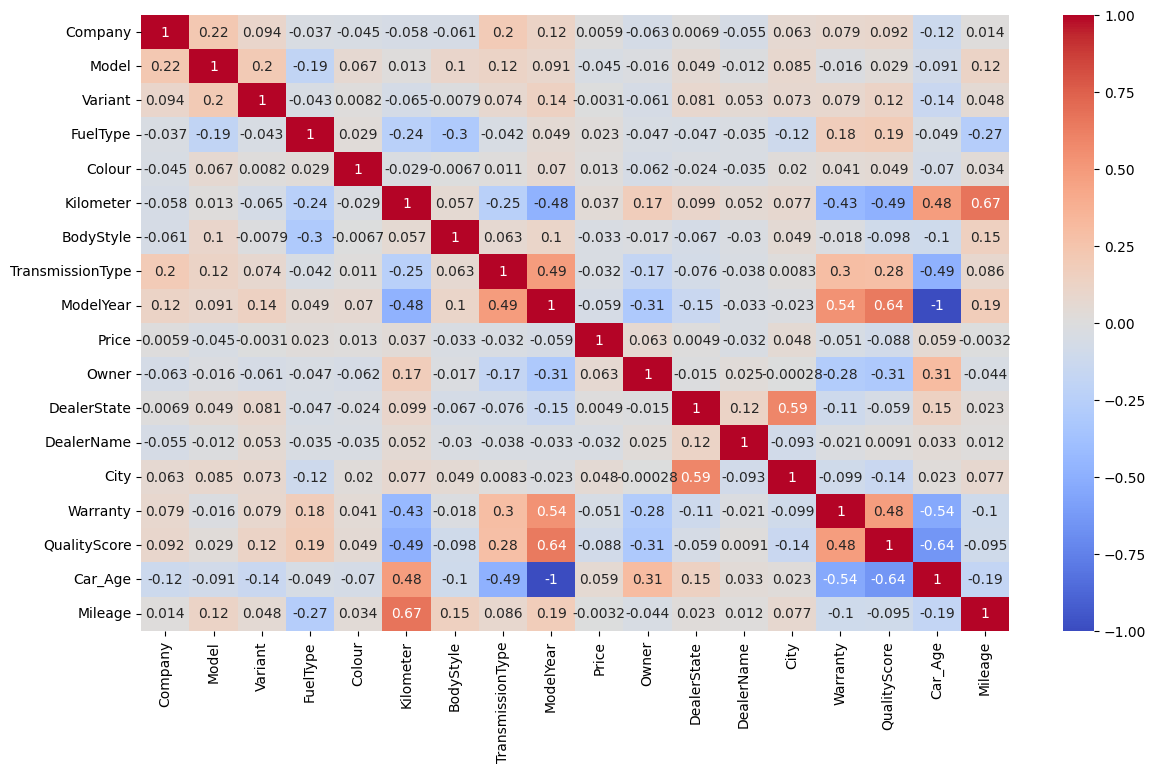

In [129]:
# correlation of dataframe to each column
plt.figure(figsize=(14, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

#### Splitting Dataset into train test split

In [130]:
df.head(2)

,Company,Model,Variant,FuelType,Colour,Kilometer,BodyStyle,TransmissionType,ModelYear,Price,Owner,DealerState,DealerName,City,Warranty,QualityScore,Car_Age,Mileage
0,12,26,5,4,61,33197,1,2,2018,5.75,0,2,52,0,1,7.8,6,5533.0
1,12,9,275,4,56,10322,1,1,2021,4.35,0,2,38,0,1,8.3,3,3441.0


In [131]:
# Splitting into X and y
X = df[['Company', 'FuelType', 'Kilometer', 'BodyStyle', 'TransmissionType', 'Owner', 'Warranty', 'QualityScore', 'Car_Age', 'Mileage']]
y = df['Price']

In [132]:
X

,Company,FuelType,Kilometer,BodyStyle,TransmissionType,Owner,Warranty,QualityScore,Car_Age,Mileage
0,12,4,33197,1,2,0,1,7.8,6,5533.0
1,12,4,10322,1,1,0,1,8.3,3,3441.0
2,7,4,37889,1,1,0,1,7.9,9,4210.0
3,19,4,13106,1,2,0,1,8.1,4,3276.0
4,5,1,104614,1,1,1,0,7.5,14,7472.0
...,...,...,...,...,...,...,...,...,...,...
1059,7,4,42918,1,2,0,1,8.3,4,10730.0
1060,7,4,78910,4,2,0,0,7.8,5,15782.0
1061,11,1,76000,5,2,0,0,6.8,11,6909.0
1062,12,1,80120,1,2,0,0,7.4,6,13353.0


In [133]:
y

0       5.75
1       4.35
2       4.70
3       9.90
4       2.70
        ... 
1059    7.15
1060    5.00
1061    5.75
1062    7.71
1063    4.99
Name: Price, Length: 1063, dtype: float64

In [134]:
ss = StandardScaler()
X = pd.DataFrame(ss.fit_transform(X), columns=X.columns)

In [135]:
X.head(2)

,Company,FuelType,Kilometer,BodyStyle,TransmissionType,Owner,Warranty,QualityScore,Car_Age,Mileage
0,0.187136,0.761023,-0.580534,-1.089526,0.653651,-0.416049,0.595097,0.041566,-0.380032,-0.534097
1,0.187136,0.761023,-1.256751,-1.089526,-1.057756,-0.416049,0.595097,0.736295,-1.381621,-1.044458


In [136]:
# Splitting into train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [137]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

Shape of X_train: (797, 10)
Shape of X_test: (266, 10)


### Model Selection

#### 1. Decision Tree Regressor

In [138]:
# Initialize Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [139]:
# Predict on the test set
dt_predictions = dt_model.predict(X_test)
dt_predictions

array([12.25,  5.95,  4.75,  4.71,  5.75,  3.5 ,  3.4 ,  6.4 , 10.75,
       19.75,  5.96,  4.6 ,  3.15,  3.6 ,  8.25,  6.1 , 31.75, 19.75,
        5.35,  7.6 ,  4.95,  4.25,  2.25,  4.71,  4.8 ,  7.19,  4.  ,
        4.5 ,  7.9 ,  3.95, 11.5 , 18.25,  4.6 ,  7.8 ,  7.2 ,  8.95,
        4.55,  4.  ,  7.29,  7.5 ,  7.35,  4.75,  4.8 , 10.75, 21.  ,
        3.5 ,  7.27,  4.45,  2.9 ,  4.2 ,  8.5 ,  7.27,  4.  ,  4.99,
       13.8 ,  3.5 ,  6.25, 14.9 ,  5.45,  7.85,  6.75,  4.5 ,  3.6 ,
        7.19,  3.6 ,  8.9 ,  6.25,  8.99, 15.  ,  4.5 , 26.75,  3.95,
        4.95,  8.75,  2.9 ,  7.35,  6.  ,  2.95,  5.3 , 17.75,  6.55,
        5.6 ,  5.45,  6.25,  3.4 ,  6.95, 26.9 , 20.11,  6.85,  4.  ,
        4.99, 12.75,  3.25,  5.5 ,  4.25,  4.6 ,  6.75,  8.5 ,  9.25,
        4.95, 10.5 ,  8.5 ,  8.25, 19.  , 10.25,  6.75,  5.45, 13.8 ,
       21.49,  7.85, 14.5 ,  5.68,  9.5 , 12.25,  3.5 ,  7.25, 17.9 ,
        5.7 ,  6.25,  3.  , 11.45,  4.87, 10.75, 22.5 ,  6.85,  5.29,
        4.85,  4.75,

#### 2. Gradient Boost Regressor

In [142]:
from sklearn.ensemble import GradientBoostingRegressor

In [143]:
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
gbr_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [144]:
gbr_predictions = gbr_model.predict(X_test)

#### 3. XGBoost

In [147]:
import xgboost as xgb

In [148]:
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [149]:
xgb_predictions = xgb_model.predict(X_test)

### Perfomance Evaluation

In [152]:
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f'\n{model_name} Performance:')
    print(f'Mean Squared Error: {mse:.2f}')
    print(f'Mean Absolute Error: {mae:.2f}')
    print(f'R2 Score: {r2:.2f}')
    print('-' * 30)

In [153]:
evaluate_model(y_test, dt_predictions, 'Decision Tree Regressor')
evaluate_model(y_test, gbr_predictions, 'Gradient Boosting Regressor')
evaluate_model(y_test, xgb_predictions, 'XGBoost Regressor')


Decision Tree Regressor Performance:
Mean Squared Error: 17.48
Mean Absolute Error: 2.46
R2 Score: 0.33
------------------------------

Gradient Boosting Regressor Performance:
Mean Squared Error: 9.90
Mean Absolute Error: 2.10
R2 Score: 0.62
------------------------------

XGBoost Regressor Performance:
Mean Squared Error: 10.10
Mean Absolute Error: 2.08
R2 Score: 0.61
------------------------------


##### Conclusion
1. Gradient Boosting Regressor seems to be the best performing model in this set, with the lowest MSE and the highest R² score. This model explains more variance in the target variable compared to the others.

2. XGBoost Regressor also performs well, nearly on par with Gradient Boosting, and could be a strong alternative.

3. Decision Tree Regressor performs reasonably well, but it is less effective than the Gradient Boosting and XGBoost models.

4. CatBoost Regressor and Random Forest Regressor perform poorly in this context, with extremely high errors and negative R² scores. This suggests they are not well-suited to this particular dataset or that there are issues with their implementation or the data processing.

#### Hyperparameter Tuning

In [154]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [155]:
parameters = {
    'n_estimators': [50, 100, 200, 300],          
    'max_features': ['auto', 'sqrt', 'log2'],      
    'max_depth': [10, 20, 30, 50],           
    'min_samples_split': [2, 5, 10],               
    'min_samples_leaf': [1, 2, 4]
}

In [156]:
grid_search = GridSearchCV(estimator= gbr_model, param_grid=parameters)

In [157]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [10, 20, 30, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 300]})

In [158]:
y_pred_gbr = gbr_model.predict(X_test)

In [159]:
mse = mean_squared_error(y_test, y_pred_gbr)
r2 = r2_score(y_test, y_pred_gbr)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 9.89925723501839
R-squared: 0.6208460316823425


### Conclusion
-  A lower MSE indicates a better fit, as the model's predictions are closer to the actual values.
-  The error is moderate, which means the model has some deviation from the true values. This could indicate that the model’s predictions are somewhat     accurate but there is still room for improvement.